# Importing Necessary Libraries

In [5]:
import numpy as np

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
import pandas as pd
data = pd.read_csv("Titanic.csv")

# Loading The Dataset

In [8]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
data.isnull().sum(

)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data Preprocessing

#### Dropping irrelevant columns

In [10]:
data.drop(["PassengerId" , "Cabin"] , axis =1 , inplace = True)

#### Imputation with mean value of column

In [11]:
data["Age"] = data["Age"].fillna(sum(data[data["Age"].isna()==False]["Age"])/sum(data["Age"].isna()==False))

In [12]:
data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [13]:
data["Embarked"].fillna('S' , inplace = True)

C:\Users\aditya\AppData\Local\Temp\ipykernel_15496\4037531892.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Embarked"].fillna('S' , inplace = True)


In [14]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [15]:
data.drop(["Name" , "Ticket"] , axis =1 , inplace = True)

In [16]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


#### Performing data encoding

In [17]:
data["Sex"] = (data["Sex"]=="male").astype(int)
data["Embarked_S"] = (data["Embarked"]=="S").astype(int)
data["Embarked_C"] = (data["Embarked"]=="C").astype(int)

In [18]:
data.drop("Embarked" , axis = 1 , inplace = True)

In [19]:
data["Pclass_3"] = (data["Pclass"]==3).astype(int)
data["Pclass_2"] = (data["Pclass"]==2).astype(int)
data.drop("Pclass" , axis =1 , inplace = True)

In [20]:
for col in ["Age" , "Fare" , "Parch" , "SibSp"]:
    u = sum(data[col])/len(data[col])
    std = ((sum(data[col]**2)/len(data[col])) - (u**2))**0.5
    data[col] = (data[col] - u)/std

#### Final data after preprocessing

In [21]:
data

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Pclass_3,Pclass_2
0,0,1,-5.924806e-01,0.432793,-0.473674,-0.502445,1,0,1,0
1,1,0,6.387890e-01,0.432793,-0.473674,0.786845,0,1,0,0
2,1,0,-2.846632e-01,-0.474545,-0.473674,-0.488854,1,0,1,0
3,1,0,4.079260e-01,0.432793,-0.473674,0.420730,1,0,0,0
4,0,1,4.079260e-01,-0.474545,-0.473674,-0.486337,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
886,0,1,-2.077088e-01,-0.474545,-0.473674,-0.386671,1,0,0,1
887,1,0,-8.233437e-01,-0.474545,-0.473674,-0.044381,1,0,0,0
888,0,0,-2.733968e-16,0.432793,2.008933,-0.176263,1,0,1,0
889,1,1,-2.846632e-01,-0.474545,-0.473674,-0.044381,0,1,0,0


# Train-Test-split

In [28]:
train_size = int(0.8*len(data))
train_rows = np.random.permutation(len(data))
train_data = pd.DataFrame(np.array(data)[train_rows[:train_size]] , columns = data.columns)
test_data = pd.DataFrame(np.array(data)[train_rows[train_size:]] , columns = data.columns)

# Defining the Bagging Class using 4 Desicion Tree models and bootstrapping

In [3]:
class Bagging:
    def __init__(self , max_depth , x , y):
        self.max_depth = max_depth
        self.x = np.array(x)
        self.y = np.array(y)
    def bootstrap(self):
        self.bootstrap_x = []
        self.bootstrap_y = []
        self.random_cols = []
        for i in range(4):
            random_rows = np.random.randint(0 , len(self.x) , len(self.x))
            self.bootstrap_x.append(self.x[random_rows])
            self.bootstrap_y.append(self.y[random_rows])
            
    def train(self):
        self.bootstrap()
        self.dr1 = DecisionTreeClassifier(criterion = 'entropy' , max_depth = self.max_depth)
        self.dr2 = DecisionTreeClassifier(criterion = 'entropy' , max_depth = self.max_depth)
        self.dr3 = DecisionTreeClassifier(criterion = 'entropy' , max_depth = self.max_depth)
        self.dr4 = DecisionTreeClassifier(criterion = 'entropy' , max_depth = self.max_depth)
        self.dr1.fit(self.bootstrap_x[0] , self.bootstrap_y[0])
        self.dr2.fit(self.bootstrap_x[1] , self.bootstrap_y[1])
        self.dr3.fit(self.bootstrap_x[2] , self.bootstrap_y[2])
        self.dr4.fit(self.bootstrap_x[3] , self.bootstrap_y[3])
    def predict(self , test_data):
        k= (self.dr1.predict(test_data)+self.dr2.predict(test_data)+self.dr3.predict(test_data)+self.dr4.predict(test_data))/4
        return (k>=0.5).astype(int)

# Training the Bagging model

In [144]:
bg = Bagging(10 , train_data.drop("Survived" , axis =1) , train_data["Survived"] )

In [145]:
bg.train()

In [146]:
y_pred = bg.predict(np.array(test_data.drop("Survived" , axis = 1)))

# Accuracy and visualization

In [147]:
accuracy = np.mean(np.array(test_data["Survived"])==y_pred)

In [148]:
print(round(accuracy , 4)*100 , '%')

83.8 %


#### The graph below depicts moving average of accuracy on a window size of 10 with respect to chanding max depth to trees

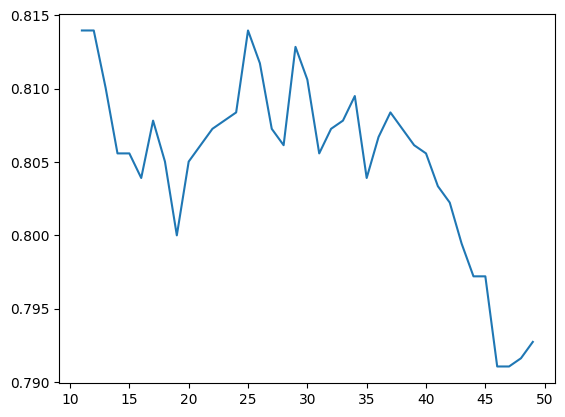

In [161]:
acc = []
for i in range(1 , 50):
    bg_temp = bg = Bagging(i , train_data.drop("Survived" , axis =1) , train_data["Survived"] )
    bg_temp.train()
    acc.append(np.mean(np.array(test_data["Survived"])==bg_temp.predict(np.array(test_data.drop("Survived" , axis = 1)))))
import matplotlib.pyplot as plt
acc2 = []
for i in range(11 , 50):
    acc2.append(np.mean(acc[i-10 : i]))
plt.plot([i for i in range(11 , 50)] , acc2)

### Hence, the best fitting model for bagging is with max tree depth equal to 10 giving 83.8% accuracy

# Defining Adaboost Class

In [29]:
class AdaBoost:
    def __init__(self , x , y , max_layers = 3):
        self.thresholds = {}
        self.x = x.copy()
        for col in self.x.columns:
            thr = np.mean(self.x[col])
            self.thresholds[col] = thr
            self.x[col] = (self.x[col] >= thr).astype(int)

        self.y = np.array(y)
        self.y = np.where(self.y==0 , -1 , 1)
        for col in self.x.columns:
            self.x[col] = (self.x[col] >= np.mean(self.x[col])).astype(int)
        self.x = np.array(self.x)
        self.weights = np.ones(len(self.x)) / len(self.x)
        self.max_layers = min(max_layers , self.x.shape[1])
    def train(self):
        self.amounts_of_say = []
        self.layers = []
        self.correlation_types = []
        for layer in range(self.max_layers):
            best_col = None
            best_error = 1
            best_type = 0
            for col in range(self.x.shape[1]):
                if col in self.layers:
                    continue
                pred = np.where(self.x[:,col]==1 , 1 , -1)
                error = np.sum(self.weights[pred != self.y])
                inv_pred = -pred
                inv_error = np.sum(self.weights[inv_pred != self.y])
                if error < best_error:
                    best_error = error
                    best_col = col
                    best_type = 0
                if inv_error < best_error:
                    best_error = inv_error
                    best_col = col
                    best_type = 1
            alpha = 0.5 * np.log((1-best_error)/best_error)
            self.amounts_of_say.append(alpha)
            self.layers.append(best_col)
            self.correlation_types.append(best_type)
            preds = np.where(self.x[:,best_col]==1 , 1 , -1)
            if best_type == 1:
                preds = -preds
            self.weights *= np.exp(-alpha * self.y * preds)
            self.weights /= np.sum(self.weights)
    def predict(self , X):
        X = X.copy()
        for col in X.columns[:-1]:
            X[col] = (X[col] >= self.thresholds[col]).astype(int)

        X = np.array(X)
        final_pred = np.zeros(len(X))
        for alpha , col , corr_type in zip(self.amounts_of_say , self.layers , self.correlation_types):
            preds = np.where(X[:,col]==1 , 1 , -1)
            if corr_type == 1:
                preds = -preds
            final_pred += alpha * preds
        return np.where(final_pred >= 0 , 1 , 0)

# Training the Adaboost model

In [30]:
ada = AdaBoost(train_data.drop("Survived" , axis = 1), train_data["Survived"] , 3)

In [31]:
ada.train()

In [32]:
y_pred = ada.predict(test_data.drop("Survived" , axis =1))

# Accuracy and visualization

In [33]:
print("Final Accuracy: " , round(np.mean(y_pred==test_data["Survived"])*100 , 2) , "%")

Final Accuracy:  76.54 %


In [34]:
import matplotlib.pyplot as plt

Accuracy at max layers 0:  40.78 %
Accuracy at max layers 1:  76.54 %
Accuracy at max layers 2:  76.54 %
Accuracy at max layers 3:  76.54 %
Accuracy at max layers 4:  76.54 %
Accuracy at max layers 5:  75.98 %
Accuracy at max layers 6:  75.98 %
Accuracy at max layers 7:  74.86 %
Accuracy at max layers 8:  74.86 %


Text(0.5, 1.0, 'Accuracy v/s Max Layers')

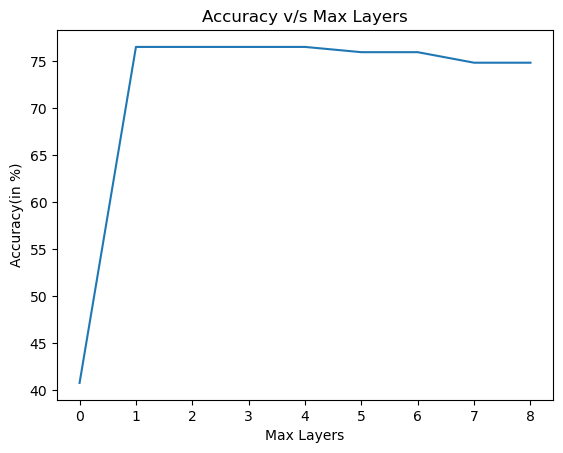

In [35]:
acc = []
for i in range(9):
    ada = AdaBoost(train_data.drop("Survived" , axis = 1), train_data["Survived"] , i)
    ada.train()
    y_pred = ada.predict(test_data.drop("Survived" , axis = 1))
    print(f"Accuracy at max layers {i}: " , round(np.mean(y_pred==test_data["Survived"])*100 , 2) , "%")
    acc.append(round(np.mean(y_pred==test_data["Survived"])*100 , 2) )
plt.plot(acc)
plt.xlabel("Max Layers")
plt.ylabel("Accuracy(in %)")
plt.title("Accuracy v/s Max Layers")

### Hence, the best fitting model for Adaboost with with 3 layers giving 78.21% accuracy on test data